# Credit Risk Modelling: Project
Antoni Ballaun, Laura Hoang, Jędrzej Joniec, Piotr Zambrzycki

## 04. Models: Neural Network

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [73]:
X_train_standard = pd.read_csv("X_train_standard.csv")
X_test_standard  = pd.read_csv("X_test_standard.csv")

In [74]:
X_train_standard["train_test"] = "train"
X_test_standard["train_test"] = "test"

X_combined = pd.concat([X_train_standard, X_test_standard], axis=0)
X_combined

,DelinquenciesLast7Years,CurrentlyInGroup,EmploymentStatus,Term,EmploymentStatusDuration,BankcardUtilization,IncomeRange,TotalTrades,InquiriesLast6Months,AmountDelinquent,...,OpenRevolvingAccounts,OpenCreditLines,AvailableBankcardCredit,TradesOpenedLast6Months,Investors,DebtToIncomeRatio,RevolvingCreditBalance,TotalCreditLinespast7years,OpenRevolvingMonthlyPayment,train_test
0,0.0,0,Employed,36,17.0,0.550000,"$75,000-99,999",27.000000,0.0,0.0,...,7,18.000000,5233.000000,2.0,1,0.260000,7011.0,36.0,179.0,train
1,0.0,0,Employed,36,77.0,0.800000,"$50,000-74,999",17.000000,1.0,0.0,...,10,12.000000,4444.000000,1.0,17,0.250000,20857.0,18.0,832.0,train
2,15.0,0,Employed,36,62.0,0.190000,"$75,000-99,999",32.000000,0.0,3127.0,...,3,2.000000,3642.000000,0.0,172,0.180000,858.0,37.0,35.0,train
3,7.0,0,Not available,36,0.0,0.561801,Not displayed,23.250511,5.0,0.0,...,2,9.286626,11220.777015,0.0,11,0.030000,8587.0,11.0,24.0,train
4,46.0,0,Employed,36,320.0,0.400000,"$75,000-99,999",31.000000,2.0,4594.0,...,15,16.000000,1139.000000,7.0,49,0.130000,1201.0,41.0,419.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22956,0.0,0,Employed,36,1.0,0.980000,"$25,000-49,999",7.000000,0.0,0.0,...,3,4.000000,59.000000,0.0,54,0.140000,3041.0,7.0,77.0,test
22957,0.0,0,Self-employed,60,89.0,0.460000,"$50,000-74,999",48.000000,1.0,0.0,...,14,14.000000,27258.000000,1.0,182,0.276853,25034.0,48.0,575.0,test
22958,0.0,1,Full-time,36,0.0,0.561801,Not displayed,23.250511,3.0,0.0,...,9,9.286626,11220.777015,2.0,94,0.300000,8587.0,14.0,502.0,test
22959,0.0,0,Employed,36,124.0,0.520000,"$100,000+",32.000000,0.0,0.0,...,9,12.000000,20327.000000,1.0,1,0.160000,24883.0,32.0,395.0,test


In [75]:
X_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114805 entries, 0 to 22960
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   DelinquenciesLast7Years             114805 non-null  float64
 1   CurrentlyInGroup                    114805 non-null  int64  
 2   EmploymentStatus                    114805 non-null  object 
 3   Term                                114805 non-null  int64  
 4   EmploymentStatusDuration            114805 non-null  float64
 5   BankcardUtilization                 114805 non-null  float64
 6   IncomeRange                         114805 non-null  object 
 7   TotalTrades                         114805 non-null  float64
 8   InquiriesLast6Months                114805 non-null  float64
 9   AmountDelinquent                    114805 non-null  float64
 10  StatedMonthlyIncome                 114805 non-null  float64
 11  CurrentDelinquencies            

Quick EDA (recap) + data preparation

COLUMNS FOR DUMMIES

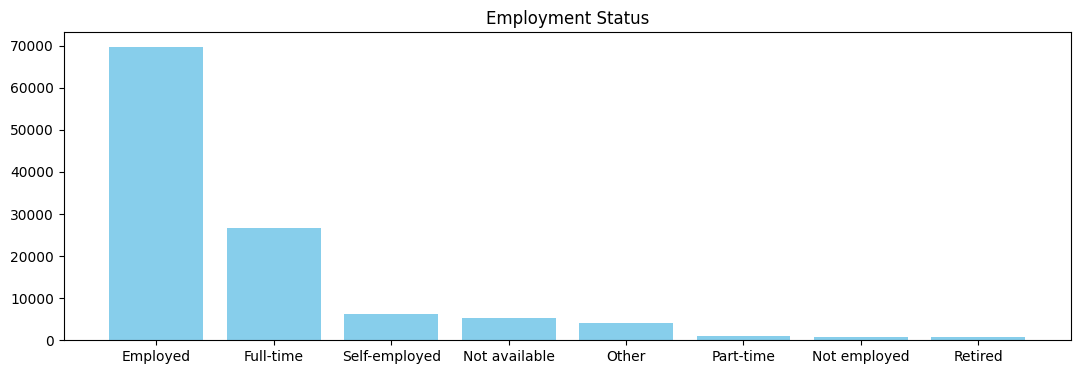

In [76]:
counts = X_combined["EmploymentStatus"].value_counts()
plt.figure(figsize=(13, 4))
plt.bar(counts.index, counts.values, color='skyblue')
plt.title("Employment Status")
plt.show()

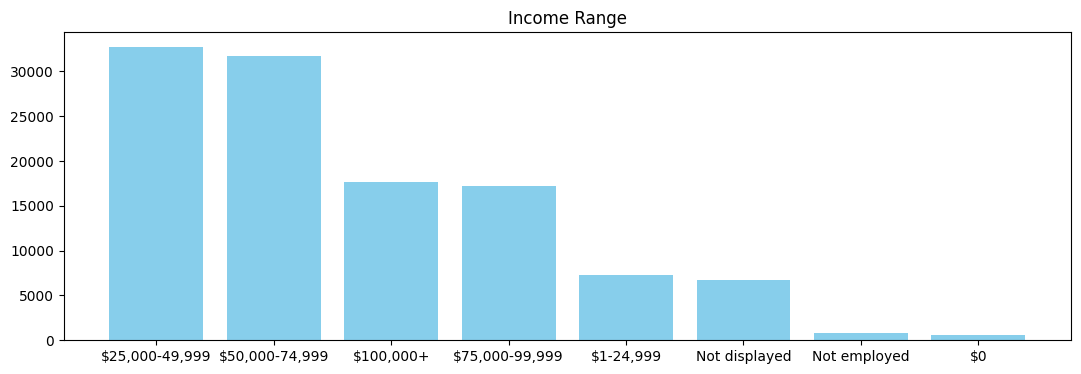

In [77]:
counts = X_combined["IncomeRange"].value_counts()
plt.figure(figsize=(13, 4))
plt.bar(counts.index, counts.values, color='skyblue')
plt.title("Income Range")
plt.show()

In [78]:
categorical_cols = ["EmploymentStatus", "IncomeRange"]

dummies = pd.get_dummies(X_combined[categorical_cols], drop_first=True).astype(int)
X_combined_wo_cat = X_combined.drop(columns=categorical_cols)
X_combined_encoded = pd.concat([X_combined_wo_cat, dummies], axis=1)
X_combined_encoded

,DelinquenciesLast7Years,CurrentlyInGroup,Term,EmploymentStatusDuration,BankcardUtilization,TotalTrades,InquiriesLast6Months,AmountDelinquent,StatedMonthlyIncome,CurrentDelinquencies,...,EmploymentStatus_Part-time,EmploymentStatus_Retired,EmploymentStatus_Self-employed,"IncomeRange_$1-24,999","IncomeRange_$100,000+","IncomeRange_$25,000-49,999","IncomeRange_$50,000-74,999","IncomeRange_$75,000-99,999",IncomeRange_Not displayed,IncomeRange_Not employed
0,0.0,0,36,17.0,0.550000,27.000000,0.0,0.0,7000.000000,0.0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0,36,77.0,0.800000,17.000000,1.0,0.0,5333.333333,0.0,...,0,0,0,0,0,0,1,0,0,0
2,15.0,0,36,62.0,0.190000,32.000000,0.0,3127.0,6416.666667,1.0,...,0,0,0,0,0,0,0,1,0,0
3,7.0,0,36,0.0,0.561801,23.250511,5.0,0.0,16666.666667,8.0,...,0,0,0,0,0,0,0,0,1,0
4,46.0,0,36,320.0,0.400000,31.000000,2.0,4594.0,6500.000000,6.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22956,0.0,0,36,1.0,0.980000,7.000000,0.0,0.0,2121.750000,0.0,...,0,0,0,0,0,1,0,0,0,0
22957,0.0,0,60,89.0,0.460000,48.000000,1.0,0.0,6000.000000,0.0,...,0,0,1,0,0,0,1,0,0,0
22958,0.0,1,36,0.0,0.561801,23.250511,3.0,0.0,3000.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
22959,0.0,0,36,124.0,0.520000,32.000000,0.0,0.0,12500.000000,0.0,...,0,0,0,0,1,0,0,0,0,0


COLUMNS FOR EMBEDDINGS

In [79]:
X_combined["BorrowerState"].value_counts()

BorrowerState
CA    15580
TX     7224
NY     7178
FL     7125
IL     6281
GA     5259
OH     4462
MI     3800
VA     3476
NJ     3297
NC     3241
WA     3207
PA     3139
MD     3012
MO     2732
MN     2450
MA     2389
CO     2348
IN     2172
AZ     2006
WI     1953
OR     1921
TN     1829
AL     1759
CT     1722
SC     1198
NV     1160
KS     1146
KY     1042
OK     1027
LA     1021
UT      930
AR      899
MS      833
NE      730
ID      645
NH      591
NM      497
RI      454
HI      430
WV      415
DC      404
MT      354
DE      318
VT      218
AK      211
SD      211
IA      194
WY      159
ME      104
ND       52
Name: count, dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_combined_encoded["BorrowerState_le"] = le.fit_transform(X_combined_encoded["BorrowerState"])
X_combined_encoded_embed = X_combined_encoded.drop(columns=["BorrowerState"])

In [81]:
X_combined_encoded_embed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114805 entries, 0 to 22960
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   DelinquenciesLast7Years             114805 non-null  float64
 1   CurrentlyInGroup                    114805 non-null  int64  
 2   Term                                114805 non-null  int64  
 3   EmploymentStatusDuration            114805 non-null  float64
 4   BankcardUtilization                 114805 non-null  float64
 5   TotalTrades                         114805 non-null  float64
 6   InquiriesLast6Months                114805 non-null  float64
 7   AmountDelinquent                    114805 non-null  float64
 8   StatedMonthlyIncome                 114805 non-null  float64
 9   CurrentDelinquencies                114805 non-null  float64
 10  PublicRecordsLast10Years            114805 non-null  float64
 11  IncomeVerifiable                

Normalizing the columns

In [82]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = X_combined_encoded_embed.drop(columns=["train_test"]).columns

scaler = StandardScaler()
X_scaled_part = scaler.fit_transform(X_combined_encoded_embed[columns_to_scale])

X_combined_encoded_embed_scaled = pd.DataFrame(X_scaled_part, columns=columns_to_scale, index=X_combined_encoded_embed.index)

X_combined_encoded_embed_scaled["train_test"] = X_combined_encoded_embed["train_test"]

Model: neural network

In [83]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
import math

X = X_combined_encoded_embed_scaled
X

,DelinquenciesLast7Years,CurrentlyInGroup,Term,EmploymentStatusDuration,BankcardUtilization,TotalTrades,InquiriesLast6Months,AmountDelinquent,StatedMonthlyIncome,CurrentDelinquencies,...,EmploymentStatus_Self-employed,"IncomeRange_$1-24,999","IncomeRange_$100,000+","IncomeRange_$25,000-49,999","IncomeRange_$50,000-74,999","IncomeRange_$75,000-99,999",IncomeRange_Not displayed,IncomeRange_Not employed,BorrowerState_le,train_test
0,-0.408354,-0.352194,-0.47003,-0.778106,-3.831561e-02,3.256845e-01,-0.590183,-0.132742,0.185601,-0.297459,...,-0.242172,-0.26125,-0.426254,-0.631600,-0.617357,2.381839,-0.250388,-0.08398,-1.253590,train
1,-0.408354,-0.352194,-0.47003,-0.143138,7.734203e-01,-5.429257e-01,-0.175078,-0.132742,-0.037823,-0.297459,...,-0.242172,-0.26125,-0.426254,-0.631600,1.619809,-0.419844,-0.250388,-0.08398,-1.186471,train
2,1.068694,-0.352194,-0.47003,-0.301880,-1.207215e+00,7.599895e-01,-0.590183,0.317055,0.107403,0.214954,...,-0.242172,-0.26125,-0.426254,-0.631600,-0.617357,2.381839,-0.250388,-0.08398,0.759967,train
3,0.280935,-0.352194,-0.47003,-0.958013,-3.604832e-16,3.085923e-16,1.485344,-0.132742,1.481465,3.801843,...,-0.242172,-0.26125,-0.426254,-0.631600,-0.617357,-0.419844,3.993794,-0.08398,-0.917997,train
4,4.121259,-0.352194,-0.47003,2.428481,-5.253572e-01,6.731285e-01,0.240027,0.528073,0.118574,2.777017,...,-0.242172,-0.26125,-0.426254,-0.631600,-0.617357,2.381839,-0.250388,-0.08398,1.028441,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22956,-0.408354,-0.352194,-0.47003,-0.947430,1.357870e+00,-1.411536e+00,-0.590183,-0.132742,-0.468352,-0.297459,...,-0.242172,-0.26125,-0.426254,1.583282,-0.617357,-0.419844,-0.250388,-0.08398,-1.320708,test
22957,-0.408354,-0.352194,1.81484,-0.016144,-3.305405e-01,2.149766e+00,-0.175078,-0.132742,0.051546,-0.297459,...,4.129298,-0.26125,-0.426254,-0.631600,1.619809,-0.419844,-0.250388,-0.08398,-0.917997,test
22958,-0.408354,2.839346,-0.47003,-0.958013,-3.604832e-16,3.085923e-16,0.655133,-0.132742,-0.350618,-0.297459,...,-0.242172,-0.26125,-0.426254,-0.631600,-0.617357,-0.419844,3.993794,-0.08398,0.088781,test
22959,-0.408354,-0.352194,-0.47003,0.354253,-1.357239e-01,7.599895e-01,-0.590183,-0.132742,0.922903,-0.297459,...,-0.242172,-0.26125,2.346017,-0.631600,-0.617357,-0.419844,-0.250388,-0.08398,-0.917997,test


In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114805 entries, 0 to 22960
Data columns (total 46 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   DelinquenciesLast7Years             114805 non-null  float64
 1   CurrentlyInGroup                    114805 non-null  float64
 2   Term                                114805 non-null  float64
 3   EmploymentStatusDuration            114805 non-null  float64
 4   BankcardUtilization                 114805 non-null  float64
 5   TotalTrades                         114805 non-null  float64
 6   InquiriesLast6Months                114805 non-null  float64
 7   AmountDelinquent                    114805 non-null  float64
 8   StatedMonthlyIncome                 114805 non-null  float64
 9   CurrentDelinquencies                114805 non-null  float64
 10  PublicRecordsLast10Years            114805 non-null  float64
 11  IncomeVerifiable                

In [85]:
# Parameters for later use
n_states = X["BorrowerState_le"].nunique()
embedding_dim = math.floor(math.sqrt(X["BorrowerState_le"].nunique()))  # embeddings dimensions ( rule of thumb - sqrt(num_catego) )
num_features = len(X.columns)-2

print(n_states, embedding_dim, num_features)

51 7 44


In [86]:
# Inputs:
# for the embedding
input_state = Input(shape=(1,))
embedding_state = Embedding(input_dim=n_states, output_dim=embedding_dim)(input_state)
embedding_state_flat = Flatten()(embedding_state)
# for other features
input_numeric = Input(shape=(num_features,))

In [87]:
# Build model
x = Concatenate()([embedding_state_flat, input_numeric])  # input
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # output - sigmoid for binary classification

In [88]:
# Compile
model = Model(inputs=[input_state, input_numeric], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

In [89]:
# Divide data
X_train_embed = X.query("train_test == 'train'")["BorrowerState_le"].values
X_train = X[X["train_test"]=="train"].drop(columns=["BorrowerState_le", "train_test"]).values

X_test_embed = X.query("train_test == 'test'")["BorrowerState_le"].values
X_test = X[X["train_test"]=="test"].drop(columns=["BorrowerState_le", "train_test"]).values

y_train = pd.read_csv("y_train.csv")
y_test  = pd.read_csv("y_test.csv")

In [90]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train.to_numpy()),
    y=y_train['Defaulted'].to_numpy()
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
class_weight_dict

{0: np.float64(0.5867576408054789), 1: np.float64(3.3815905743740795)}

In [91]:
# Train
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)
history = model.fit([X_train_embed, X_train], y_train, class_weight=class_weight_dict, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7180 - auc_2: 0.8178 - loss: 0.5189 - val_accuracy: 0.7548 - val_auc_2: 0.8484 - val_loss: 0.4570
Epoch 2/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7396 - auc_2: 0.8526 - loss: 0.4714 - val_accuracy: 0.7479 - val_auc_2: 0.8507 - val_loss: 0.4845
Epoch 3/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7393 - auc_2: 0.8554 - loss: 0.4697 - val_accuracy: 0.7456 - val_auc_2: 0.8529 - val_loss: 0.4670
Epoch 4/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7433 - auc_2: 0.8585 - loss: 0.4626 - val_accuracy: 0.7481 - val_auc_2: 0.8542 - val_loss: 0.4602
Epoch 5/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7452 - auc_2: 0.8628 - loss: 0.4575 - val_accuracy: 0.7275 - val_auc_2: 0.8529 - val_loss: 0.4826
Epoch 6/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7424 - auc_2: 0.8652 - loss: 0.4498 - val_accuracy: 0.7536 - val_auc_2: 0.8548 - val_loss: 0.4657
Epoc

In [92]:
loss, accuracy, auc = model.evaluate([X_test_embed, X_test], y_test)
print(f'Accuracy: {accuracy:.4f}, AUC: {auc:.4f}')

718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7614 - auc_2: 0.8421 - loss: 0.4563
Accuracy: 0.7575, AUC: 0.8389


2871/2871 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
718/718 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


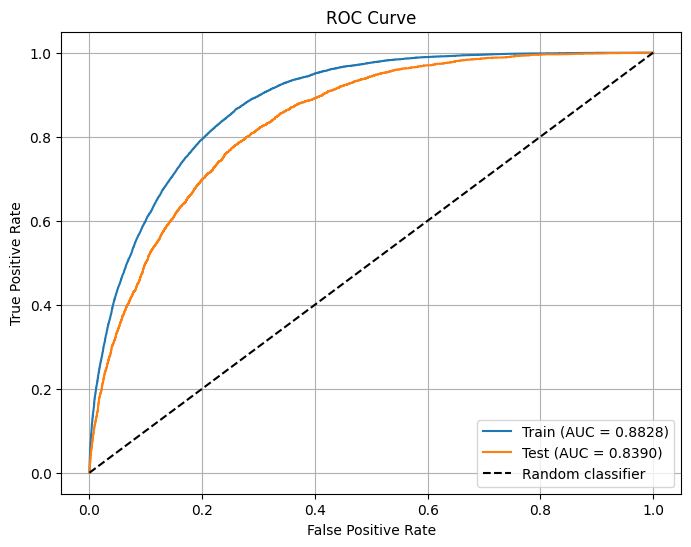

In [93]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_train = model.predict([X_train_embed, X_train]).flatten()
y_pred_test = model.predict([X_test_embed, X_test]).flatten()

fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)

auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train (AUC = {auc_train:.4f})")
plt.plot(fpr_test, tpr_test, label=f"Test (AUC = {auc_test:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

In [102]:
y_pred_test = model.predict([X_test_embed, X_test]).flatten()

thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    # y_pred_t = (y_prob_rf >= t).astype(int)
    y_pred_thresh = (y_pred_test >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_thresh).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold={t:.2f} → F1={f1:.3f}, TPR={tpr:.3f}, FPR={fpr:.3f}")


718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step
Threshold=0.10 → F1=0.376, TPR=0.960, FPR=0.549
Threshold=0.15 → F1=0.394, TPR=0.941, FPR=0.494
Threshold=0.20 → F1=0.410, TPR=0.921, FPR=0.448
Threshold=0.25 → F1=0.422, TPR=0.898, FPR=0.411
Threshold=0.30 → F1=0.437, TPR=0.880, FPR=0.374
Threshold=0.35 → F1=0.449, TPR=0.856, FPR=0.341
Threshold=0.40 → F1=0.460, TPR=0.827, FPR=0.309
Threshold=0.45 → F1=0.471, TPR=0.796, FPR=0.276
Threshold=0.50 → F1=0.482, TPR=0.761, FPR=0.243
Threshold=0.55 → F1=0.488, TPR=0.713, FPR=0.210
Threshold=0.60 → F1=0.492, TPR=0.658, FPR=0.177
Threshold=0.65 → F1=0.494, TPR=0.597, FPR=0.143
Threshold=0.70 → F1=0.490, TPR=0.531, FPR=0.111
Threshold=0.75 → F1=0.462, TPR=0.446, FPR=0.084
Threshold=0.80 → F1=0.436, TPR=0.372, FPR=0.059
Threshold=0.85 → F1=0.379, TPR=0.284, FPR=0.037


In [103]:
# threshold = 0.506
threshold = 0.70

In [104]:
y_pred_train = model.predict([X_train_embed, X_train]).flatten()
y_pred_train = (y_pred_train >= threshold).astype(int)

y_pred_test = model.predict([X_test_embed, X_test]).flatten()
y_pred_test = (y_pred_test >= threshold).astype(int)

2871/2871 ━━━━━━━━━━━━━━━━━━━━ 3s 888us/step
718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step


In [105]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
# print("Train Confusion Matrix:")
# print(cm_train)
# print("\nTest Confusion Matrix:")
# print(cm_test)

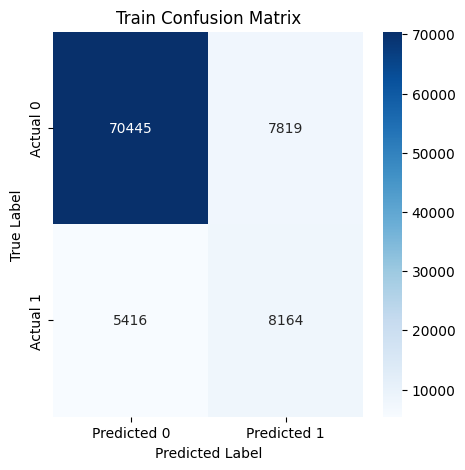

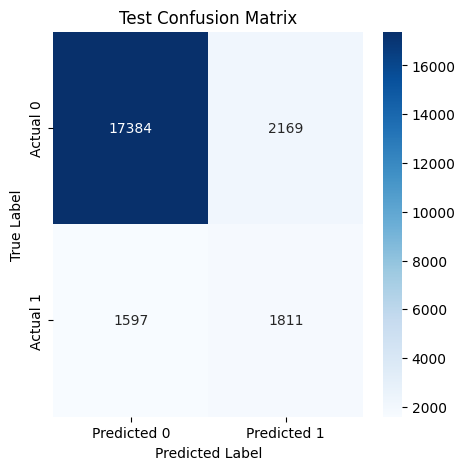

In [106]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Predicted 0", "Predicted 1"], 
                yticklabels=["Actual 0", "Actual 1"])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(cm_train, "Train Confusion Matrix")
plot_confusion_matrix(cm_test, "Test Confusion Matrix")

In [107]:
y_pred = model.predict([X_test_embed, X_test]).flatten()
y_pred_thresh = (y_pred >= threshold).astype(int)

print("=== Final Classification Report @ 0.55 ===")
print(classification_report(y_test, y_pred_thresh))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_thresh))

roc_auc = roc_auc_score(y_test, y_pred)
gini = 2 * roc_auc - 1
print(f"AUC: {roc_auc:.2f}")
print(f"Gini: {gini:.2f}")

718/718 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step
=== Final Classification Report @ 0.55 ===
              precision    recall  f1-score   support

           0       0.92      0.89      0.90     19553
           1       0.46      0.53      0.49      3408

    accuracy                           0.84     22961
   macro avg       0.69      0.71      0.70     22961
weighted avg       0.85      0.84      0.84     22961

Confusion Matrix:
[[17384  2169]
 [ 1597  1811]]
AUC: 0.84
Gini: 0.68


In [108]:
import joblib

joblib.dump(model, "models/neural_network.pkl")
print("Model zapisany jako neural_network.pkl")

Model zapisany jako neural_network.pkl
